## Домашняя работа
### Easy
Для данных с Титаника обучить модели логистической регресси и решающего дерева на 80% обучающей выборки и проверить результат на 20%. У какой модели результат лучше?

In [196]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

#Тренировочный датафрейм
df = pd.read_csv(f'./Data/train.csv')
#Преобразуем категорию "пол"
df = df.join(pd.get_dummies(df['Sex']))
#Удаляем обработанные и некатегорируемые признаки
df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','PassengerId'], inplace=True, axis=1)
df.fillna(0, inplace=True)
#Из исходного выделяем x-датафрейм
x_cols = list(df.columns)
x_cols.remove('Survived')
x_df = df[x_cols]
#Из исходного выделяем y-датафрейм
y_df = np.ravel(df[['Survived']])

#Разделяем датафреймы на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)

#Расчет точности модели
def model_acc(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

#Модель - логистическая регрессия
#Если не использовать параметр solver='liblinear', 
#иногда получаем ошибку - AttributeError: 'str' object has no attribute 'decode'
#Точность модели логистической регрессии
acc_lr = model_acc(LogisticRegression(solver='liblinear'))

#Точность модели решающего дерева
acc_dt = model_acc(DecisionTreeClassifier())

print(f'Точность по модели логистической регресии: {acc_lr*100:.1f}%')
print(f'Точность по модели решающего дерева: {acc_dt*100:.1f}%')

if (acc_lr>acc_dt):
    print('Точность модели логистической регрессии выше точности модели решающего дерева.')
elif (acc_lr<acc_dt):
    print('Точность модели логистической регрессии ниже точности модели решающего дерева.')
elif (acc_lr==acc_dt):
    print('Точности обеих моделей равны.')

Точность по модели логистической регресии: 76.5%
Точность по модели решающего дерева: 77.1%
Точность модели логистической регрессии ниже точности модели решающего дерева.


## Normal
Используя кросс-валидацию, применить к данным Титаника модель RandomForestClassifier. Сравнить с первыми двумя моделями.

In [206]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv = cross_val_score(RandomForestClassifier(), x_df, y_df)
if (acc_lr<=max(cv)) & (acc_lr>=min(cv)):
    print(f'Точность модели логистической регрессии соответствует точности модели случайного леса.')
if (acc_lr>max(cv)):
    print(f'Точность модели логистической регрессии выше точности модели случайного леса.')
if (acc_lr<min(cv)):
    print(f'Точность модели логистической регрессии ниже точности модели случайного леса.')

if (acc_dt<=max(cv)) & (acc_dt>=min(cv)):
    print(f'Точность модели решающего дерева соответствует точности модели случайного леса.')
if (acc_dt>max(cv)):
    print(f'Точность модели решающего дерева выше точности модели случайного леса.')
if (acc_dt<min(cv)):
    print(f'Точность модели решающего дерева ниже точности модели случайного леса.')    
    

Точность модели логистической регрессии ниже точности модели случайного леса.
Точность модели решающего дерева соответствует точности модели случайного леса.


## Hard
Чтобы окончательно разобраться с линейной регрессией, лучше всего один раз реализовать ее самостоятельно. В этом и состоит суть задания.

В качестве данных использовать датасет https://www.kaggle.com/mustafaali96/weight-height. Единицы измерения - дюймы и фунты.

Будем исследовать как рост зависит от веса для мужчин.

Алгоритм решения задачи:

Написать функцию для подсчета прогноза линейной регрессии , в которой w и b - веса модели, которые мы будем оптимизировать, а x - входные данные (зависимая переменная). Обращаю внимание, что функция должна быть векторизована, то есть в x должна быть возможность передать вектор значений, а не одно число.

Написать функцию ошибки для модели . ,  - параметры модели, а  - вектор входящих данных. В качестве ошибки будем использовать Mean Squared Error (MSE).

Минимизировать функцию J по параметрам  и , используя данные . Минимизацию можно проводить при помощи функции minimize.

Подставить получившиеся минимальные значения w и b в функцию f, нарисовать диаграмму рассеивания (scatter plot) и отобразить работу модели (пример графика есть в этом ноутбуке)

Функция линейной регрессии (зависимость роста от веса) имеет вид: y = 0.006995087286824962*x + 1.1598685351119569


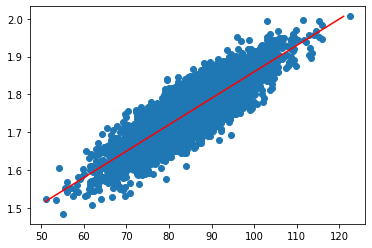

In [227]:
import numpy as np
import matplotlib.pyplot as plt
N = 100     # число экспериментов
sigma = 3   # стандартное отклонение наблюдаемых значений
k = 0.5     # теоретическое значение параметра k
b = 2       # теоретическое значение параметра b
x = np.array(range(N))
f = np.array([k*z+b for z in range(N)])
y = f + np.random.normal(0, sigma, N)

#Расчет X, Y аналитической функции линейной регрессии
def mnk(x, y):
    N = len(x)
    # вычисляем коэффициенты
    mx = x.sum()/N
    my = y.sum()/N
    a2 = np.dot(x.T, x)/N
    a11 = np.dot(x.T, y)/N
    k = (a11 - mx*my)/(a2 - mx**2)
    b = my - k*mx
    x2 = list(range(int(x.min()), int(x.max())))
    y2 = [k*i+b for i in x2]
    return (x2, y2, k, b)

#Получаем данные
df = pd.read_csv(f'./Data/weight-height.csv')

#Из датафрейма выбираем только мужчин
df = df.loc[df['Gender']=='Male']
#Переводим в метрические единицы
df['Weight'] = 0.453592 *df['Weight']
df['Height'] = 2.54 * df['Height']/100
#Функция линейной регрессии имеет вид: y = 0.12491793829156869*x + 45.66411555558636

#Строим совокупность всех пар Вес - Рост
plt.scatter(df['Weight'], df['Height'])

#Строим линейную регрессию
x2, y2, k, b = mnk(df['Weight'], df['Height'])
print(f'Функция линейной регрессии (зависимость роста от веса) имеет вид: y = {k}*x + {b}')

plt.plot(x2, y2, color='r')